In [79]:
import matplotlib.pyplot as plt
import re
import os
import sys
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Weak SDE approximation/C++/underdamped")

import numpy as np
from scipy.stats import norm
from settings_and_potential import *
font_size=35
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
# nrank = sys.argv[0]
range_bins=[-3,3]
tau=0.1
s=1

In [80]:
#/////////////////////////////////////////
#// Anisotropique potential definition //
#////////////////////////////////////////
def U(x):
    res = np.log(s*(x*x-1)*(x*x-1))
    return res
#define DIVTERM          //define to use
m=0.001      #     // minimum step scale factor
M=1.5       #       // maximum step scale factor
dt=0.0005     #      // artificial time stepsize
gamma=0.1         #   // friction coefficient
tau=0.1          #  // 'temperature'
numruns=500000         # // total number of trajectories
numsam=10000  
r=0.01
nsnapshot=5


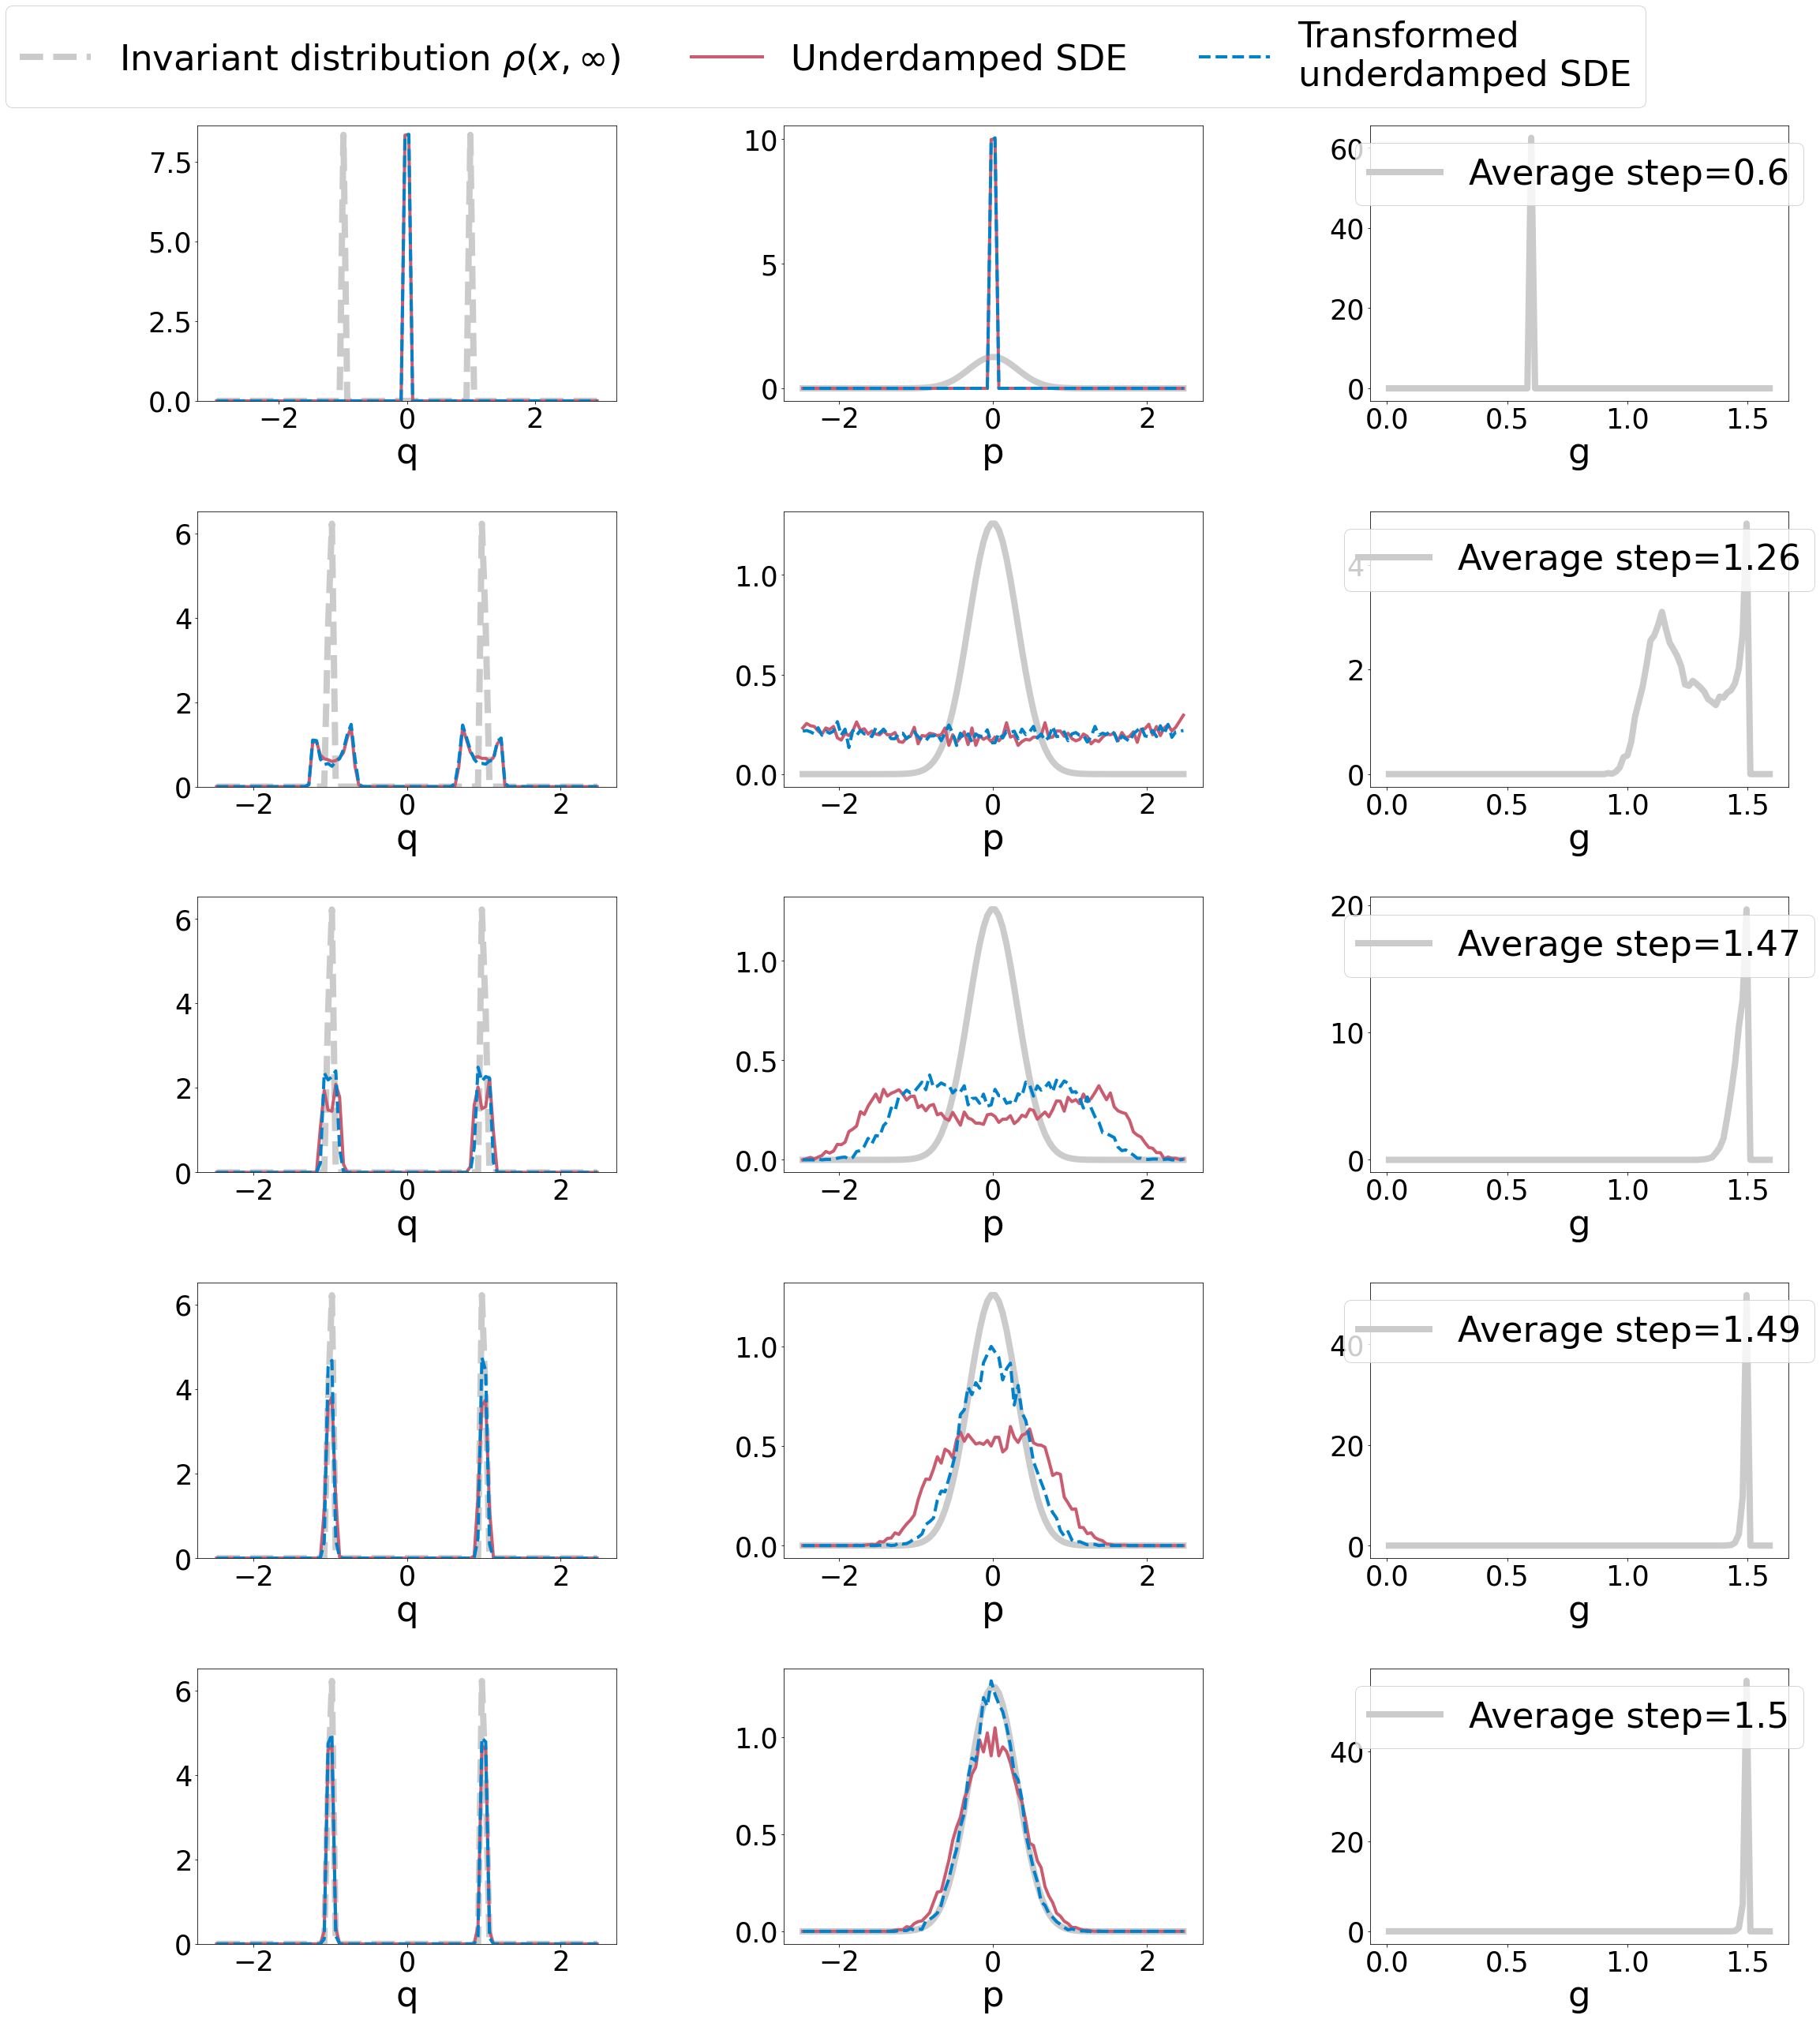

In [81]:
fig, ((axs))= plt.subplots(nsnapshot,3,figsize=(35,40))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

for i in range(nsnapshot):
    filename= "data_one_dt/snapshot/vec_noada"+str(i)+".txt"
    q_noada,p_noada,g=openCfile_qp(filename)
    filename= "data_one_dt/snapshot/vec_tr"+str(i)+".txt"
    q_tr,p_tr,g=openCfile_qp(filename)

    # SDE
    histogram_noada,bins = np.histogram(q_noada,bins=nbins,range=range_bins, density=True)
    midx_sde = (bins[0:-1]+bins[1:])/2

    #transformed
    histogram_tr,bins = np.histogram(q_tr,bins=nbins,range=range_bins, density=True)
    midx_tr = (bins[0:-1]+bins[1:])/2

    # Invariant distribution for q
    rho = np.exp(- U(midx_sde)/tau)
    # # normal dis
    # rho = np.exp(- 0.5*midx_tr*midx_tr/tau)
    rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral

    # Q
    ###6
    axs[i,0].plot(midx_sde,rho,"--",linewidth=lw*2,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
    axs[i,0].plot(midx_sde,histogram_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
    # axs.plot(midx_re,histogram_re,"--",linewidth=2.5,label='Underdamped SDE\nwith naive time rescaling',color=myblue)
    axs[i,0].plot(midx_tr,histogram_tr,"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
    axs[i,0].set_ylim(0,np.max(rho)+0.3)
    axs[i,0].set_xlabel("q", fontsize=font_size)
    # axs[i,0].legend(fontsize=font_size)


    ############
    ## P vals ## 
    ############
    range_bins=[-2.5,2.5]

    # no ada
    histogram_noada,bins = np.histogram(p_noada,bins=nbins,range=range_bins, density=True)
    midx_noada = (bins[0:-1]+bins[1:])/2

    # transformed
    histogram_tr,bins = np.histogram(p_tr,bins=nbins,range=range_bins, density=True)
    midx_tr = (bins[0:-1]+bins[1:])/2

    # Invariant distribution for p
    ### momentum p invariant
    rho = np.exp(-(midx_noada**2)/(2*tau))
    rho = rho / (np.sum(rho)* (midx_noada[1]-midx_noada[0]) ) # Normalize rho by dividing by its approx. integral

    axs[i,1].plot(midx_noada,rho,linewidth=lw*2,label='Invariant distribution $\\rho_{\\infty}(.)$',color=mygrey)
    axs[i,1].plot(midx_noada,histogram_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
    # axs.plot(midx_re,histogram_re,"--",linewidth=2.5,label='Overdamped SDE\nwith naive time rescaling',color=myblue)
    axs[i,1].plot(midx_tr,histogram_tr,"--",linewidth=lw,label='Transformed\nunderdamped SDE',color=myblue)
    axs[i,1].set_xlabel("p", fontsize=font_size)

    ############
    ## Histograms g vals ## 
    ############
    range_bins_g=[0,M+0.1]
    histogram_g,bins = np.histogram(g,bins=nbins,range=range_bins_g, density=True)
    midx_noada = (bins[0:-1]+bins[1:])/2
    mean_g=round(np.mean(g),2)

    axs[i,2].plot(midx_noada,histogram_g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
    axs[i,2].set_xlabel("g", fontsize=font_size)
    axs[i,2].legend(fontsize=font_size, loc="upper center")

axs[0,0].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(1.5, 1.5),)